In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

In [2]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]

In [3]:
train=pd.read_csv("C:\\Users\\kshas\\Downloads\\Nasa_TurboEngine\\CMaps\\train_FD001.txt",sep=" ",names=columns)

In [5]:
test=pd.read_csv("C:\\Users\\kshas\\Downloads\\Nasa_TurboEngine\\CMaps\\test_FD001.txt",sep=" ",names=columns)

In [7]:
test_result=pd.read_csv("C:\\Users\\kshas\\Downloads\\Nasa_TurboEngine\\CMaps\\RUL_FD001.txt",sep=" ",names=None)

In [11]:
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [10]:
train=train.drop(columns=["sensor22","sensor23"])

# Engine Lifetime

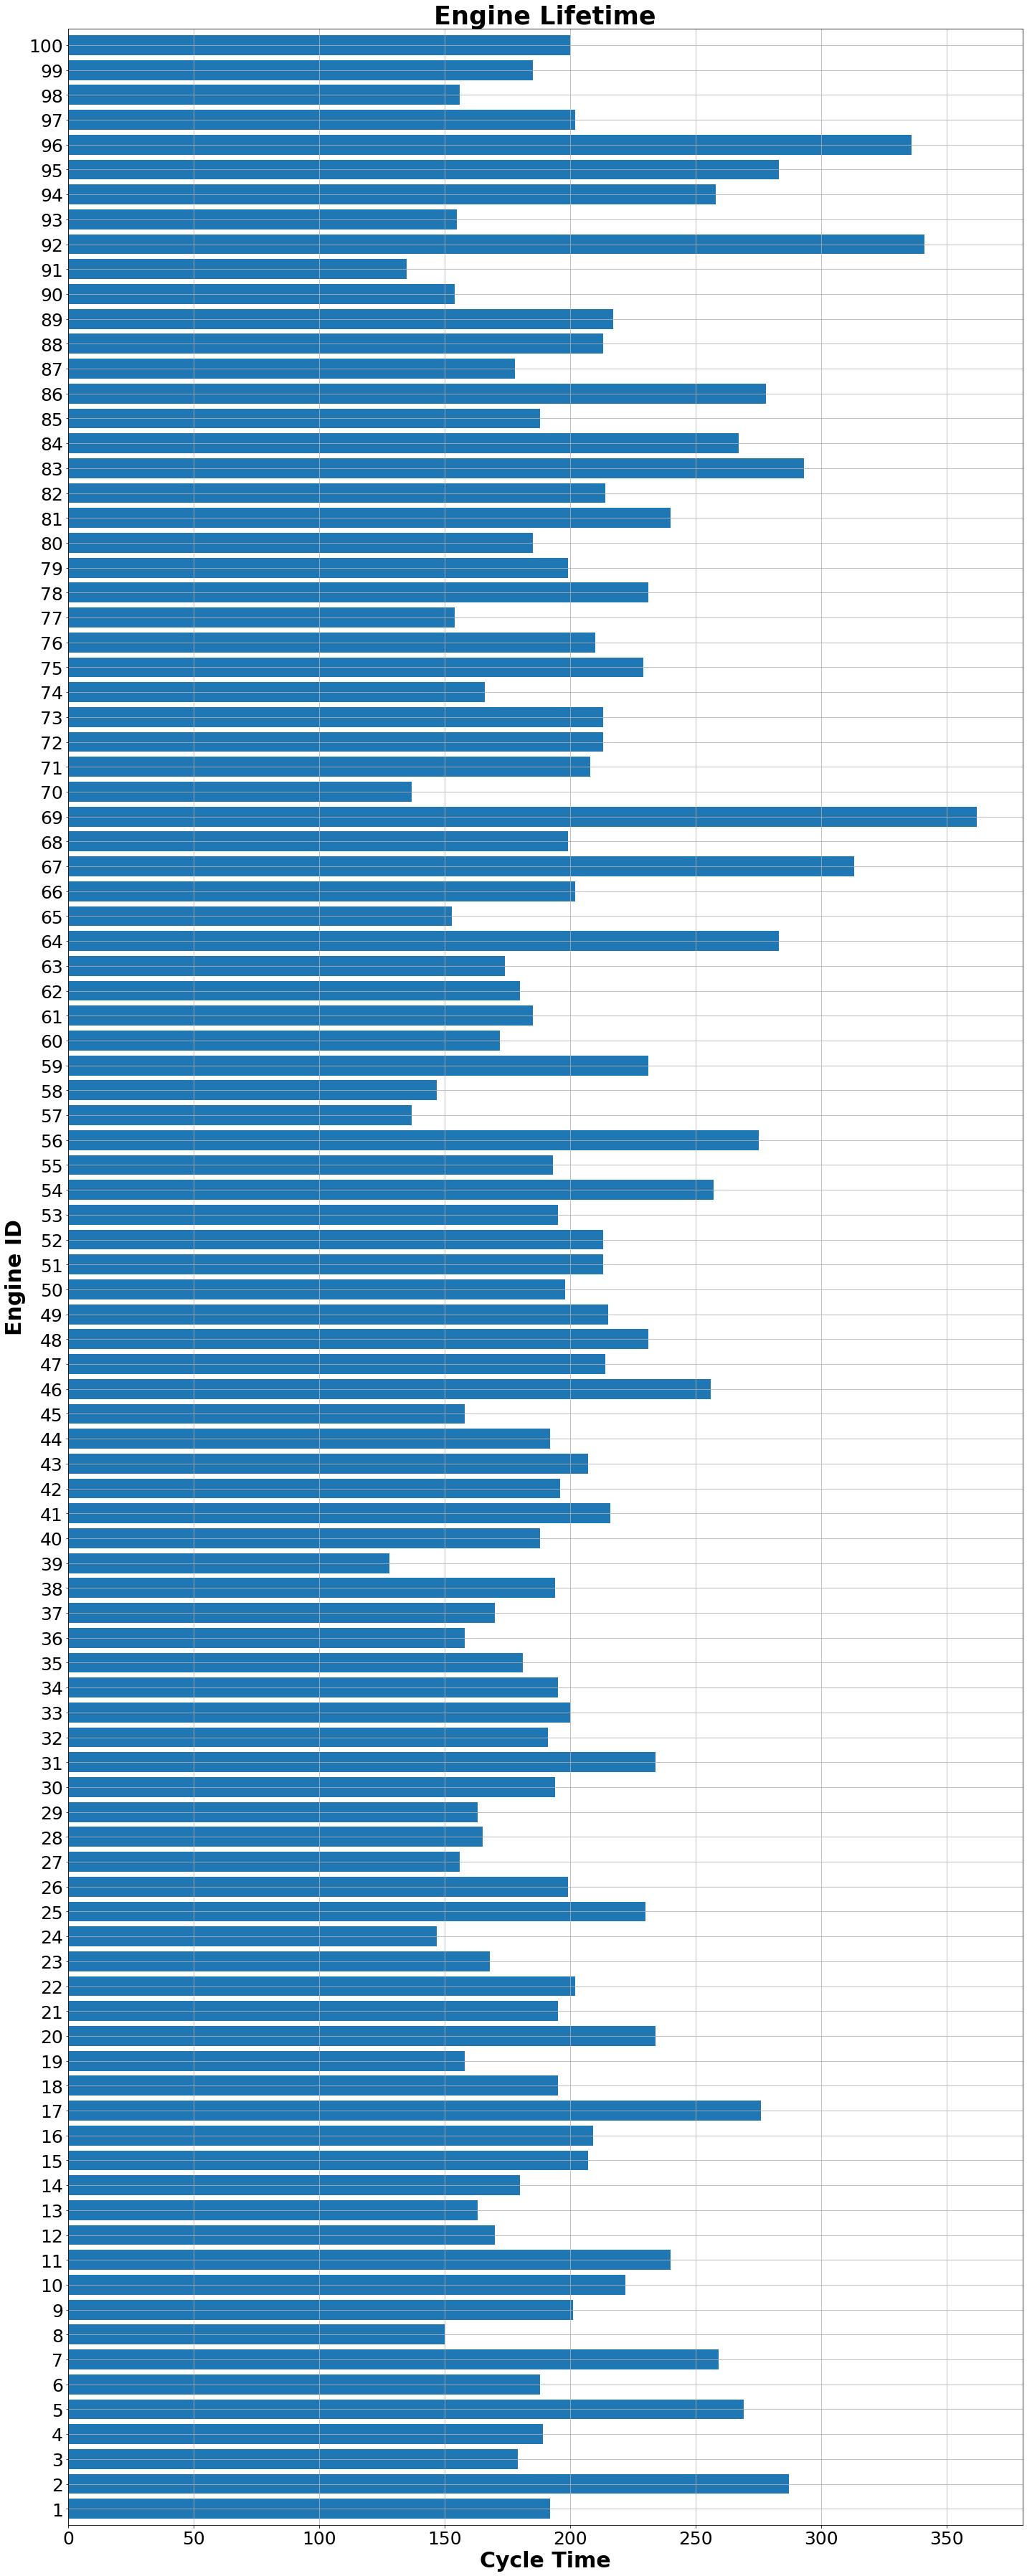

In [12]:
plt.figure(figsize=(20,50))
ax=train.groupby('id')['cycle'].max().plot(kind="barh",width=0.8,stacked=True,align='center',rot=0)
plt.title("Engine Lifetime",fontweight='bold',size=35)
plt.xlabel("Cycle Time",fontweight='bold',size=30)
plt.xticks(size=25)
plt.ylabel('Engine ID',fontweight='bold',size=30)
plt.yticks(size=25)
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
test_result.columns=["rul","null"]
test_result.head()

,rul,null
0,98,NaN
1,69,NaN
2,82,NaN
3,91,NaN
4,93,NaN


In [14]:
test_result.drop(["null"],axis=1,inplace=True)
test_result["id"]=test_result.index+1
test_result.head()

,rul,id
0,98,1
1,69,2
2,82,3
3,91,4
4,93,5


In [15]:
rul=pd.DataFrame(test.groupby('id')['cycle'].max()).reset_index()
rul.columns=['id','max']

In [16]:
rul.head()

,id,max
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [17]:
test_result['rul_failed']=test_result["rul"]+rul["max"]
test_result.head()

,rul,id,rul_failed
0,98,1,129.0
1,69,2,118.0
2,82,3,208.0
3,91,4,197.0
4,93,5,191.0


In [18]:
test_result.drop(['rul'],axis=1,inplace=True)

In [19]:
test=test.merge(test_result,on=['id'],how='left')

In [20]:
test["remaining_cycle"]=test["rul_failed"]-test["cycle"]
test.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,rul_failed,remaining_cycle
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN,129.0,128.0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN,129.0,127.0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN,129.0,126.0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN,129.0,125.0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN,129.0,124.0


In [22]:
df_train=train
df_test=test.drop(["sensor22","sensor23"],axis=1)

In [23]:
df_train["remaining_cycle"]= df_train.groupby(['id'])['cycle'].transform(max)-df_train['cycle']

In [24]:
df_train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [25]:
df_test.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,rul_failed,remaining_cycle
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,129.0,128.0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,129.0,127.0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,129.0,126.0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,129.0,125.0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,129.0,124.0


In [27]:
op_set=["op"+str(i) for i in range(1,4)]
sensor=["sensor"+str(i) for i in range(1,22)]

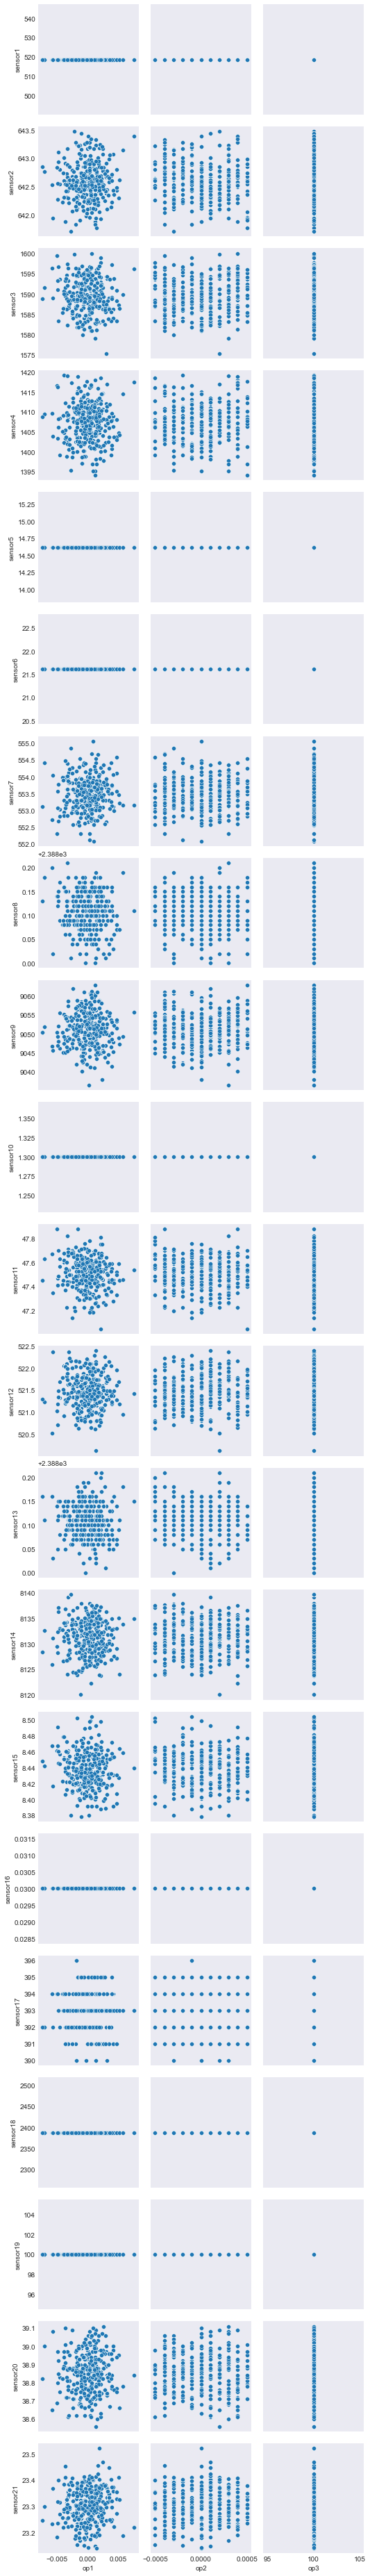

In [28]:
plt.style.use("seaborn-dark")
ax=sns.pairplot(test.query("cycle"),x_vars=op_set,y_vars=sensor,palette="hus1")

In [30]:
x=df_train.drop(["id","op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19","remaining_cycle"],axis=1)
y=df_train['remaining_cycle']
print('x shape : ',x.shape)
print('y shape : ',y.shape)

x shape :  (20631, 17)
y shape :  (20631,)


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=3)
print('X_train shape : ',x_train.shape)
print('X_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

X_train shape :  (16504, 17)
X_test shape :  (4127, 17)
y_train shape :  (16504,)
y_test shape :  (4127,)


In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize model
lr = LinearRegression()

# Train model
lr.fit(x_train, y_train)

# Predict
y_pred = lr.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")


Linear Regression MSE: 1657.0525960968139


In [37]:
mae=mean_absolute_error(y_test,y_pred)
print(f"Linear Regression MAE: {mae}")

Linear Regression MAE: 31.285935856338266


# Decision Tree Regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

# Initialize model
tree_reg = DecisionTreeRegressor()

# Train model
tree_reg.fit(x_train, y_train)

# Predict
y_pred_tree = tree_reg.predict(x_test)

# Evaluate
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree Regressor MSE: {mse_tree}")
mae=mean_absolute_error(y_test,y_pred_tree)
print(f"Decision Tree Regressor MSE: {mae}")

Decision Tree Regressor MSE: 2766.9013811485343
Decision Tree Regressor MSE: 36.483644293675795


# LASSO

In [47]:
from sklearn.linear_model import LassoCV

# Initialize LassoCV
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)  # alphas=None lets the model decide the best alpha

# Fit the model
lasso_cv.fit(x_train, y_train)

# Optimal alpha value
print(f"Optimal alpha value: {lasso_cv.alpha_}")

Optimal alpha value: 3.520159934450298


In [49]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1.0)  # You can adjust the alpha parameter if needed

# Train model
lasso_reg.fit(x_train, y_train)

# Predict
y_pred_lasso = lasso_reg.predict(x_test)

# Evaluate
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}")
mae=mean_absolute_error(y_test,y_pred_lasso)
print(f"Lasso Regression MSE: {mae}")

Lasso Regression MSE: 1699.183919051675
Lasso Regression MSE: 31.715762711390216


In [50]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=4)  # You can adjust the alpha parameter if needed

# Train model
lasso_reg.fit(x_train, y_train)

# Predict
y_pred_lasso = lasso_reg.predict(x_test)

# Evaluate
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}")
mae=mean_absolute_error(y_test,y_pred_lasso)
print(f"Lasso Regression MSE: {mae}")

Lasso Regression MSE: 1771.8986893075619
Lasso Regression MSE: 32.43882952656357


In [51]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 3.520159934450298)  # You can adjust the alpha parameter if needed

# Train model
lasso_reg.fit(x_train, y_train)

# Predict
y_pred_lasso = lasso_reg.predict(x_test)

# Evaluate
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}")
mae=mean_absolute_error(y_test,y_pred_lasso)
print(f"Lasso Regression MSE: {mae}")

Lasso Regression MSE: 1765.202883984635
Lasso Regression MSE: 32.37541058404296


# RandomForestRegressor

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Train model
rf_reg.fit(x_train, y_train)

# Predict
y_pred_rf = rf_reg.predict(x_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regressor MSE: {mse_rf}")
mae=mean_absolute_error(y_test,y_pred_rf)
print(f"Random Forest Regressor MSE: {mae}")

Random Forest Regressor MSE: 1327.9606334141022
Random Forest Regressor MSE: 25.335703901138846


In [52]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_reg = RandomForestRegressor(n_estimators=400, random_state=42)  # Adjust hyperparameters as needed

# Train model
rf_reg.fit(x_train, y_train)

# Predict
y_pred_rf = rf_reg.predict(x_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regressor MSE: {mse_rf}")
mae=mean_absolute_error(y_test,y_pred_rf)
print(f"Random Forest Regressor MSE: {mae}")

Random Forest Regressor MSE: 1312.9957776229708
Random Forest Regressor MSE: 25.16078992003877


In [53]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=42)  # Adjust hyperparameters as needed

# Train model
rf_reg.fit(x_train, y_train)

# Predict
y_pred_rf = rf_reg.predict(x_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regressor MSE: {mse_rf}")
mae=mean_absolute_error(y_test,y_pred_rf)
print(f"Random Forest Regressor MSE: {mae}")

Random Forest Regressor MSE: 1314.4723666341167
Random Forest Regressor MSE: 25.1887286164284
